# 3. Programmare grafici
**ULTIMA MODIFICA: 03.11.2022**

In questo capitolo vedremo con in Python possiamo rappresentare dei grafici di funzioni di variabili reali a valori reali matematiche (Sezione 3.1) e di semplici funzione trigonometriche (Sezione 3.2). In seguito, vediamo come sia possbile programmare delle  funzioni per rappresentare graficamente il concetto di ricorsione visto nel capitolo precedente, arrivando a programmare il *Woodcut* di Escher.

## 3.1 Funzioni di variabili reali a valori reali
Vediamo ora come sia possibile riprodurre in Python i grafici seguenti, presi da un testo classico di Analisi (il Giaquinta-Modica):

![Fig38](images/Fig38.png)

Per poter riprodurre questi plot in Python, prima cosa dobbiamo importare nel workspace le due librerie seguenti:

1. Numerical Python: [Numpy](http://www.numpy.org/)
2. Python Plotting: [Matplotlib](https://matplotlib.org/)

In Python, per importare tutte le procedure e le funzioni di una libreria si usa il comando:
```
from <nome_libreria> import *
```
In questo modo, se al posto di `nome_libreria` mettiamo per esempio `numpy`, importeremo nel nostro workspace tutte le funzioni definite nella libreria `numpy`. Spesso, per tenere il workspace *pulito* (poche variabili, poche funzioni) si importano solo le funzioni della libreria che devono essere effettivamente usate.
Nel nostro caso, dalle due librerie servono sono la funzione `linspace` di `numpy`, e le procedure `plot, xlabel, ylabel, show` di `matplotlib`:


In [2]:
# Importo dalla libreria solo le procedure che utilizzo
from numpy import linspace
from matplotlib.pyplot import plot, xlabel, ylabel, show

In [3]:
who

linspace	 os	 plot	 show	 sys	 xlabel	 ylabel	 


Vediamo prima a cosa serve la funzione [linspace(a, b, n)](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linspace.html). Questa funzione serve per ottenere una sequenza di $n$ numeri equidistanziati nell'intervallo $[a,b]$. Per esempio:

In [4]:
linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In pratica, possiamo usare la funzione `linspace` per definire il dominio di una funzione come un insieme finito di punti in $\mathbb{R}$. Facendo riferimento alla Figura 3.8 riportata sopra, possiamo definire il dominio:

In [ ]:
D = linspace(-2, 2, 1000)
# print(D)

Per ogni punto del dominio $x\in D$, possiamo calcolare il valore di $y=f(x)$. Dobbiamo definire ora qual'è la funzione di cui vogliamo effettivamente visualizzare il grafico. Consideriamo prima la funzione:

$f(x) = x^2$

Che può essere implementata in modo diretto con la funzione seguente che usa l'operatore `**` per 
l'elevamento a potenza, ovvero `a**b` rappresenta $a$ *elevato* $b$:

In [18]:
def Quadrato(x):
    return x**2

**ATTENZIONE**: In Python, l'operatore `^` non viene usato per l'elevamento a potenza, ma indica il [Bitwise XOR](https://docs.python.org/3/reference/expressions.html).

In [8]:
print("power:", 4**2)
print("bitwise xor:", 4^2)

power: 16
bitwise xor: 6


In [9]:
print('4 =', bin(4))
print('2 =', bin(2))
print('4 xor 2 =', bin(6))

4 = 0b100
2 = 0b10
4 xor 2 = 0b110


A questo punto, tornando al plot di una funzione, ci serve un modo per applicare la funzione matematica scelta ad ogni elemento del dominio. Per far questo. possiamo usare una sintassi particolare, chiamata **list comprehension**, definita come segue:
```
Y = [F(x) for x in D]
```
in cui `<for>` e `<in>` sono due parole chiave di Python, mentre `<F>`, `<D>`, e `<Y>` sono rispettivamente:

1. (input) `F()` è una procedura che implementa una funzione $f : \mathbb{R} \rightarrow \mathbb{R}$, come ad esempio la funzione `Quadrato` definita sopra.

2. (input) `D` è una sequenza di numeri, ottenuta per esempio con la funzione `linspace`, a cui vogliamo applicare la funzione `F()`.

3. (output) `Y` è una sequenza di numeri, della stessa lunghezza di `D`, che contiene per ogni elemento `x in D`, il corrispondente valore `F(x)`. 

Vediamo un esempio concreto.

In [15]:
D = linspace(1,5,5)
print(D)

[1. 2. 3. 4. 5.]


In [16]:
Y = [Quadrato(x) for x in D]
print(Y)

NameError: name 'Quadrato' is not defined

Come si può vedere ad ogni elemento della sequenza `D` corrisponde un valore della sequenza `Y`, che contiene il suo quadrato. Possiamo usare questi punti per interpolare un grafico di questa funzione, ma per ottenere un'interpolazione accurata, dobbiamo utilizzare un numero più elevato di elementi del dominio.

Se ritorniamo all'esempio della Figura 3.8 mostrata, possiamo definire le coppie da rappresentare $(x, y)$, ovvero $(x, f(x))$, nel modo seguente:

In [19]:
D = linspace(-2,2,1000) # 1000 punti equi distanziati nell'intervallo [-2,2]

In [20]:
Y = [Quadrato(x) for x in D]

In [21]:
print(D[0], Y[0])

-2.0 4.0


Vediamo ora come utilizzare questi punti per creare un grafico di `Quadrato(x)`. 

Per poterlo fare dobbiamo utilizzare le funzioni:

* `plot(x, y)`: prepara il grafico per ogni coppia di punti contenuti nelle due sequenze x e y. Le due sequenze devono essere della stessa lunghezza.
* `xlabel` e `ylabel`: servono per definire la descrizione dell'asse delle ascisse e delle ordinate.
* `show`: serve per visualizzare effettivamente il grafico appena definito.

Per maggiori dettagli, si veda la documentazione di [plot](http://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html), [xlabel](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xlabel.html), [ylabel](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.ylabel.html) e [show](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.show.html).

Utilizzando questi comandi, possiamo rappresentare graficamente la funzione $x^2$:

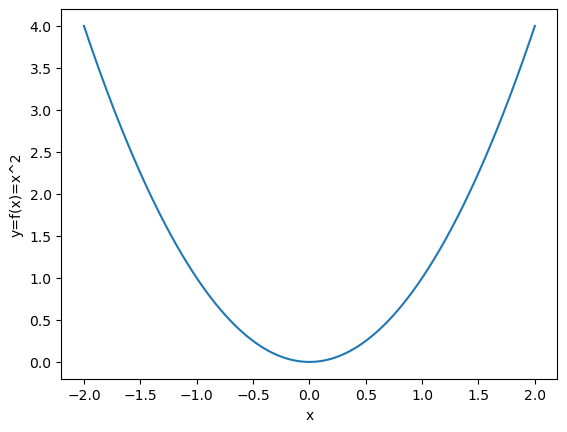

In [22]:
plot(D, Y)
xlabel("x")
ylabel("y=f(x)=x^2")
show()

Se invece di rappresentare la funzione $f(x)=x^2$ volessimo rappresentare la funzione $f(x)=x^3$, definita nello stesso dominio, ci basta calcolare la sequenza di numeri `Y`:

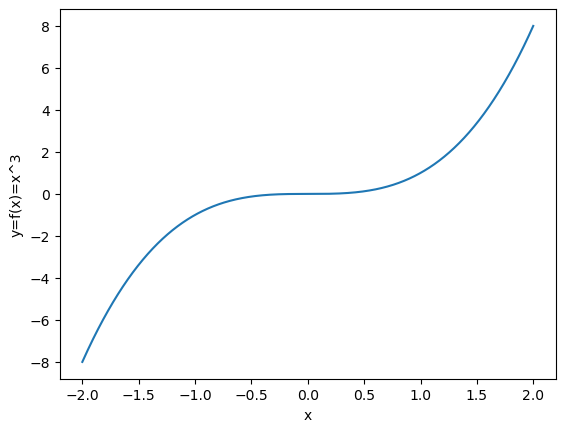

In [23]:
Y = [x**3 for x in D]
plot(D, Y)
xlabel("x")
ylabel("y=f(x)=x^3")
show()

A volte, quello che si vuole fare in analisi per studiare una funzione è sovrapporre sullo stesso grafico funzioni tra di loro simili, ma che sono definite da valori diversi dello stesso parametro. Se consideriamo per esempio la funzione potenza $f(x)=x^n$ per $x \in D$, potremmo voler dare una rappresentazione grafica delle quattro funzioni che si ottengono al variare del parametro $n \in \{1,2,3,4\}$. Questo può essere ottenuto in Python richiamando più volte la funzione `plot(x,y)`, prima di chiamare la funzione `show()`.

**ESEMPIO:** (diverse funzioni sullo stesso plot)

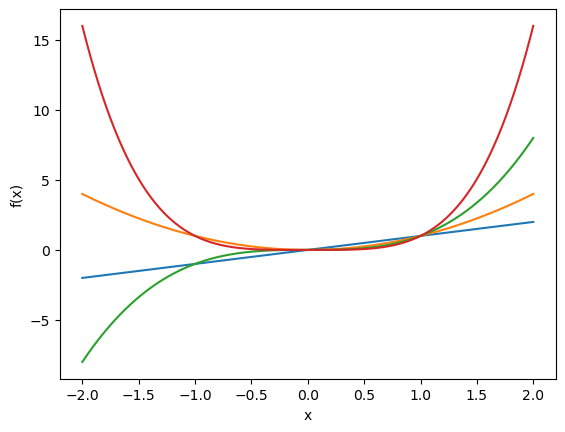

In [24]:
D = linspace(-2, 2, 1000)
plot(D, [x**1 for x in D])
plot(D, [x**2 for x in D])
plot(D, [x**3 for x in D])
plot(D, [x**4 for x in D])
xlabel("x")
ylabel("f(x)")
show()

In alcuni casi, può essere utile rappresentare una funzione in scala logaritmica su entrambi gli assi, oppure, può essere utile aggiungere una legenda al grafico, per poter distinguere facilmente le diverse funzioni rappresentate. In questo caso si devono usare le procedure `xscale`, `yscale`, e `legend`, come mostrato nell'esempio seguente.

Per maggiori dettagli, si veda la documentazione di  [xscale](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xscale.html), [yscale](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.yscale.html) e [legend](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.legend.html).

**ESEMPIO:** (coordinate cartesiane e legenda)

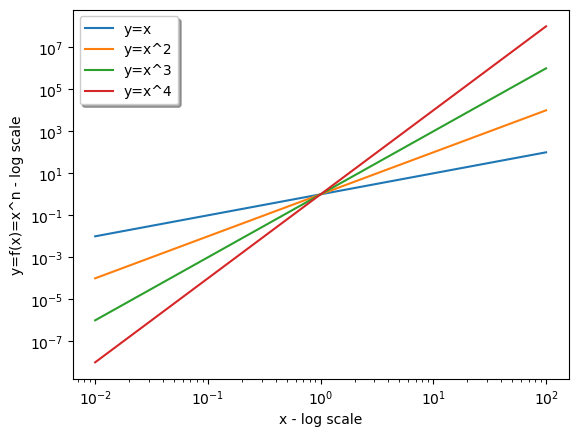

In [25]:
%matplotlib inline
# Importo dalla libreria solo gli oggetti che mi servono veramente
from numpy import linspace
from matplotlib.pyplot import axvline, plot, xlabel, ylabel, show, xscale, yscale, legend
D = linspace(0.01, 100, 1000)
plot(D, [x**1 for x in D], label="y=x")
plot(D, [x**2 for x in D], label="y=x^2")
plot(D, [x**3 for x in D], label="y=x^3")
plot(D, [x**4 for x in D], label="y=x^4")
xscale("log")
yscale("log")
xlabel("x - log scale")
ylabel("y=f(x)=x^n - log scale")
legend(loc="upper left", shadow=True)
show()

### 3.1.1 Funzioni trigonometriche
Per poter rappresentare delle funzioni trigonometriche è necessario utilizzare una terza libreria di Python (abbiamo già usato `numpy` e `matplotlib`), chiamata `math`, che definisce molte costanti note (e.g. $\pi$ e $e$) e la maggior parte delle funzioni di uso comune (e.g. $\sin(x)$, $\log(x)$, $e^x$, sqrt$(x)=\sqrt(x)$, ...). Per vedere la lista completa di funzioni implementate nella libreria `math`, consultare la [documentazione della libreria](https://docs.python.org/3/library/math.html).

**ESEMPIO:** plot della funzione $f(x)=a\,\sin(x)$, per $a=0.5,1,3$, nel dominio $[0,2 \pi]$.

In [26]:
# Per prima cosa importo la funzione sin(x) e la costante pi (pi-greco)
from math import sin, pi
print(pi)

3.141592653589793


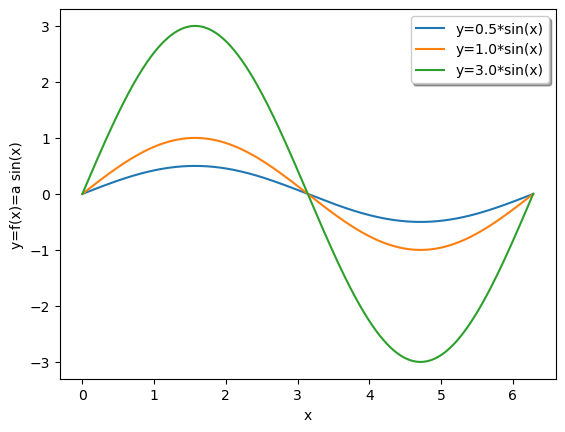

In [27]:
# Poi scrivo i comandi per ottenere i grafici voluti
D = linspace(0, 2*pi, 1000)
plot(D, [0.5*sin(x) for x in D], label="y=0.5*sin(x)")
plot(D, [1.0*sin(x) for x in D], label="y=1.0*sin(x)")
plot(D, [3.0*sin(x) for x in D], label="y=3.0*sin(x)")
xlabel("x")
ylabel("y=f(x)=a sin(x)")
legend(loc="upper right", shadow=True)
show()

**ESERCIZIO 3.1:** Rappresentare il grafico della funzione esponenziale $a^x$, nell'intervallo $[-4,4]$, utilizzando i seguenti valori di $a$: 1.2, 1.4, 2 (sovrapporre i grafici nella stessa figura). Nota: si dovrebbe ottenere un grafico simile a quello di Figura 3.19(a) mostrata sopra.

In [29]:
# DA COMPLETARE

**ESERCIZIO 3.2:** Rappresentare il grafico della funzione esponenziale $a^x$, nell'intervallo $[-4,4]$, utilizzando i seguenti valori di $a$: 0.8, 0.7, 0.5 (sovrapporre i grafici nella stessa figura). Nota: si dovrebbe ottenere un grafico simile a quello di Figura 3.19(b) del Giaquinta-Modica.

In [30]:
# DA COMPLETARE

**ESERCIZIO 3.3:** (*esercizio difficile*) Rappresentare il grafico della funzione tangente nell'intervallo $[-4 \pi, 4 \pi]$.

In [31]:
# DA COMPLETARE

**ESERCIZIO 3.4:** Rappresentare il grafico della funzione $\sin(\frac{a}{x})$, nell'intervallo $[-2 \pi, 2 \pi]$, per $a \in {1,2,3,4}$.

In [ ]:
# DA COMPLETARE

## 3.2 Ricorsioni Grafiche nel mondo di Escher

In questo notebook vediamo come con un linguaggio di programmazione molto semplice possiamo **programmare** delle funzioni ricorsive che trasformano immagini semplici in immagini articolate. L'obiettivo finale di questo notebook è di permettere allo studente di capire come scrivere un programma che produca un'immagine simile al [woodcut di Escher](https://www.wikiart.org/en/m-c-escher/square-limit), chiamato **Square Limit**:

![Escher's Fish](images/fishEscher.jpg)

**NOTA:** Per altre opere, si veda la pagina di [M.C. Escher](https://en.wikipedia.org/wiki/M._C._Escher)

**RIFERIMENTI:**     
1. La libreria svgpath2mpl (appare nella seconda meta di questo file) è stata presa da questa repository: [svgpath2mpl](https://github.com/nvictus/svgpath2mpl)
2. La classe Tile è stata ripresa e riadatta da questo sito: [programming-with-escher](https://github.com/mapio/programming-with-escher/blob/master/notebook.ipynb)

### Linguaggio di Programmazione: MicroPython
Useremo un linguaggio di Programmazione che contiene solo gli elementi seguenti:

1. L'assegnamento di valori a variabili.
2. La definizione di funzioni semplici e ricorsive.
3. La composizione di funzioni.
4. Espressioni condizionali

Vedremo come questi elementi di base possono essere usati per manipolare un dato **primitivo** di natura grafica.

In [33]:
# Per prima cosa, con il comando seguente, importiamo 
# le funzioni del nostro micro-linguaggio dalla libreria "escherFish":

from escherFish import *

In [34]:
who

D	 EndpointArc	 Quadrato	 Tile	 Y	 above	 axvline	 beside	 blank	 
edge	 f	 fish	 flip	 legend	 linspace	 os	 over	 parse_path	 
pi	 plot	 rot	 rot45	 setSize	 show	 sin	 sys	 triangle	 
xlabel	 xscale	 ylabel	 yscale	 


### 3.2.1 Dato primitivo: TILE
Se guardiamo il *woodcut* di Escher precedente, risulta chiaro come questo sia ottenuto dalla ripetizione di uno stesso **elemento base** (ovvero, un pesce stilizzato), che è stato opportunamente orientato, ridimensionato, e colorato.

Per poter cercar di riprodurre quel quadro "*programmando*", abbiamo bisogno di definire un tipo di dato fondamentale, un elemento base, che viene chiamato **TILE**. Un *tile* rappresenta un disegno unico racchiuso in un quadrato di lato unitario. Mostriamo nel seguito, come a partire da un singolo *tile*, attraverso la composizione di una sequenza di funzioni, possiamo ottenere dei disegni più complessi.

Iniziamo con un tile asimmetrico, in modo da mostrare più facilmente il tipo di trasformazioni che abbiamo a disposizione. 

Il primo tile che consideriamo è una rappresentazione grafica della lettera ``F``:

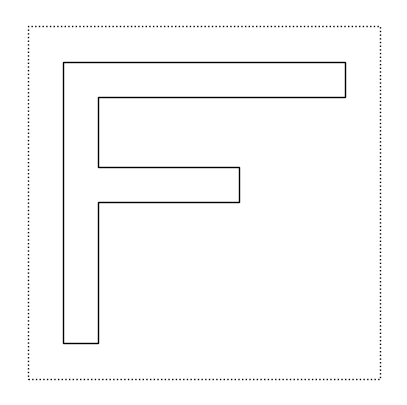

In [35]:
f

Si osservi che la parte tratteggiata non è parte del tile, ma serve per evidenziare il quadrato entro cui la tile è contenuta. Inoltre si noti come il tipo di dato "tile" è stato definito in modo che venga visualizzato nel notebook in modo automatico, senza bisogno di richiamare una funzione particolare.

### 3.2.2 Operazioni fondamentali
Vediamo ora due semplici funzioni che possiamo applicare ad un tile: possiamo ruotare in senso antiorario di $90^o$ un tile, oppure possiamo "ribaltare" (in inglese, *flip*) un tile rispetto al suo asso verticale che passa per il centro del quadrato. Per esempio, possiamo applicare al tile ``f`` le due funzioni:

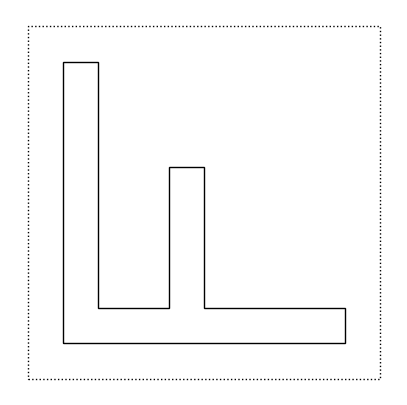

In [36]:
rot(f)

In [ ]:
f

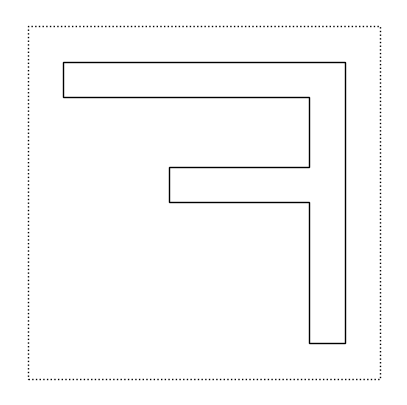

In [38]:
flip(f)

Si noti come la sintassi usata sia la stessa che abbiamo visto per la definizione di funzioni numeriche, come `sqrt(x)`, `sin(x)`, `cos(x)` o `log(x)`. L'unica differenza è che stiamo usando un dato primitivo di tipo grafico invece che di tipo numerico. Ovvero stiamo utilizzando delle funzioni:

$$f : X \rightarrow Y$$

dove $X$ e $Y$ sono l'insieme delle possibili tiles (mentre, ad esempio, per le funzioni trigonometriche $X$ e $Y$ sono sottoinsiemi di $\mathbb{R}$).
Come si possono *comporre* semplici operazioni aritmetiche (e.g., `sin(cos(x))`), anche per i tile, possiamo comporre più funzioni applicandone una dopo l'altra:

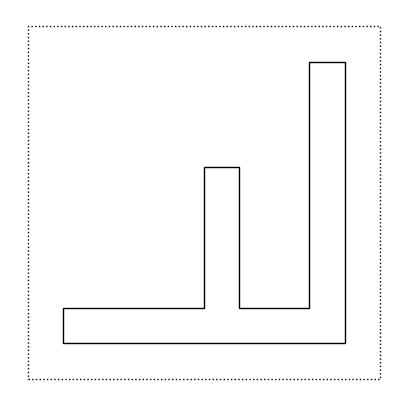

In [39]:
flip(rot(f))

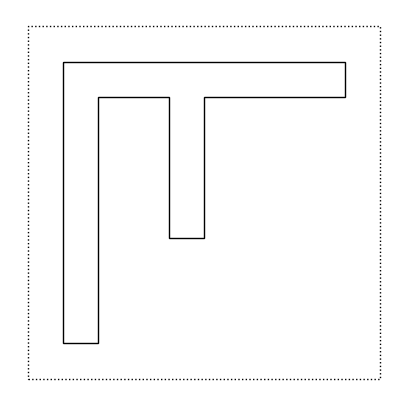

In [40]:
rot(flip(f))

Chiaramente, l'ordine con cui vengono applicate le diverse funzioni può portare a degli oggetti grafici (tiles) diversi.

### 3.2.3 Assegnamento di valori a variabili
Abbiamo detto sopra che nel nostro linguaggio possiamo introdurre delle nuove **variabili** che "memorizzano" un valore (un tile) modificato da una funzione:

In [42]:
fr = rot(f)

in questo caso, l'effetto dell'operatore di assegnamento (il simbolo dell'uguale `=`) è di assegnare alla variabile `fr` il valore di `f` ruotato di $90^o$ in senso antiorario. Se vogliamo vedere il valore della variabile `fr`, basta digitare:

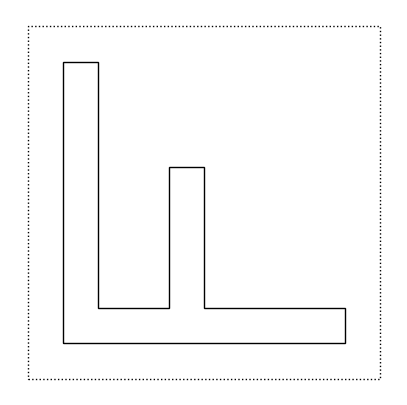

In [43]:
fr

**DOMANDA 1:** Non sarebbe comodo avere una funzione primitiva per ruotare un tile di $90^o$ in senso orario?

In [44]:
def rotOrario(x):
    return rot(rot(rot(x)))

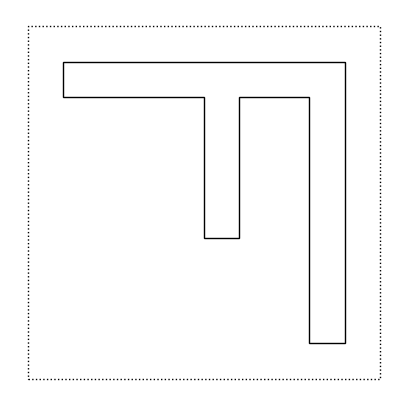

In [45]:
rotOrario(f)

Oltre a funzioni *unarie*, ovvero che prendono in input un solo argomento, possiamo definire delle operazioni fondamentali *binarie*, che prendono in input due tile e li combinano per produrre un nuovo tile:

$$f : X \times X \rightarrow X$$

Le operazioni fondamentali che introduciamo nel nostro linguaggio sono: ``above(x, y)``, ``beside(x, y)``, e ``over(x, y)``. Le prime due operazioni affiancano le due tile `x` e `y` una sopra l'altra, riscalandole in modo che il risultato sia ancora una tile contenuta nel quadrato unitario. La terza operazione, ``over``, sovrappone semplicemente le due tile.

beside(f,f)

In [ ]:
above(flip(f), rot(f))

In [ ]:
over(f, flip(f))

In [ ]:
over(flip(f), f)

### 3.2.4 Definizione di nuove funzioni
In un linguaggio di programmazione è possibile  definire nuovi funzioni che a partire dall'insieme di funzioni "primitive" del linguaggio. In questa lezione siamo interessati a definire delle funzioni che operano sui tiles, prendendo in input uno o più tile, e restituiscono in output un nuovo tile. 

La **sintassi** del linguaggio per definire nuove funzioni è la seguente:

```
def <nomefunzione>(<lista di variabili di input>):
    # insieme di operazioni e applicazioni di funzioni
    return <valore finale>
```

Le parole chiave del linguaggio sono **`def`** e **`return`**; i due punti **`:`** e la tabulazione dopo la parola **`def`** è importante; `<nomefunzione>`, `<lista di variabili di input>`, e `<valore finale>` siete voi a doverli definire.

Vediamo ora un esempio:

In [51]:
def quartet(p, q, r, s):
    return above(beside(p,q), beside(r,s))

Si noti come le parole chiave del linguaggio sono colorate in verde e il nome della funzione `quartet` (scelto da voi) sia in blue. La funzione prende in input quattro variabili, chiamate semplicemente `p`,`q`,`r`, e `s`, e produce in output un tile che risulta da mettere l'immagine ottenuta affiancando `p` e `q`, sopra l'immagine ottenuta affiancando `r` e `s` (notare che è quasi più semplice leggere il codice che non la sua descrizione testuale...).

Una volta definita la funzione `quartet` può essere utilizzata nel modo seguente:

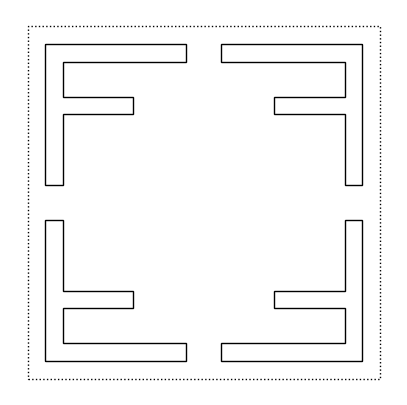

In [52]:
quartet(f, flip(f), flip(rot(rot(f))), rot(rot(f)))

In [53]:
qf = quartet(f, flip(f), flip(rot(rot(f))), rot(rot(f)))

In [54]:
q2 = quartet(qf, qf, qf, qf)

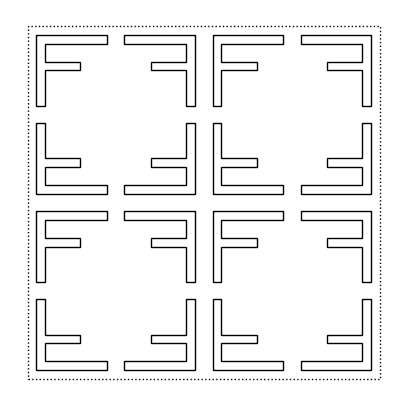

In [56]:
q2

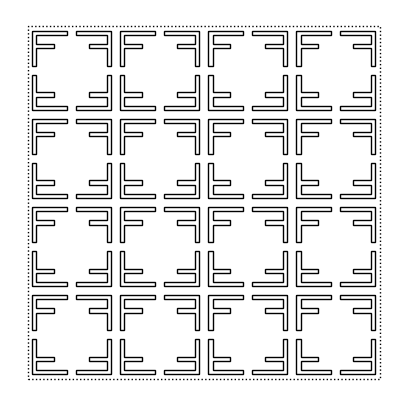

In [55]:
quartet(q2, q2, q2, q2)

### Definizioni di funzioni ricorsive ed espressioni condizionali
A questo punto possiamo introdurre delle funzioni **ricorsive** che costruiscono delle nuove tile che sono "auto simili". 
Un semplice esempio di funzione ricorsiva è la seguente

In [ ]:
def F(a, b):
    if b == 0:
        return a
    return F(a+1, b-1)

Abbiamo introdotto la nuova parola chiave `if` che serve per valutare una **espressione condizionale**: in questo caso si controlla che il valore della variabile di input chiamata `b` sia uguale a zero; se l'espressione viene verificata, allora viene restituito il valore di `a`. Altrimenti viene restituito il valore ottenuto richiamando la stessa funzione, ma con due nuove variabili di input di valore `a+1` e `b-1`.

**DOMANDA 2:** Qual'è il risultato di questa "chiamata" alla funzione `F`?

```F(13,9)```

In [57]:
# Provare a richiamare la funzione F(13,9)

**IMPORTANTE**: La funzione `F(a, b)` è detta ricorsiva perché è definita in termini di se stessa.

### 3.2.4 Composizione di funzioni
Vediamo cosa possiamo comporre funzioni ricorsive per le immagini.
Consideriamo prima due nuovi tipi di tile: 

1. un triangolo 
2. un tile vuoto, chiamato `blank`

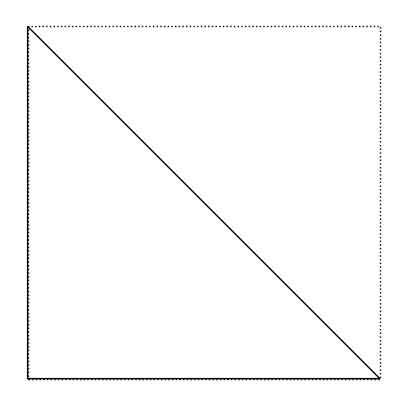

In [60]:
triangle

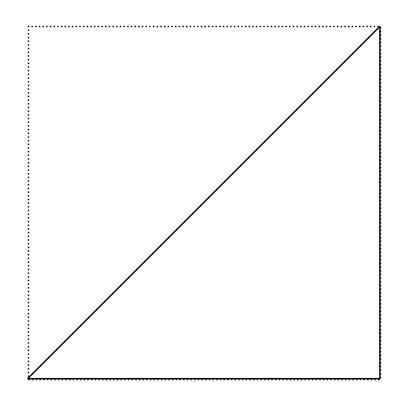

In [61]:
rot(triangle)

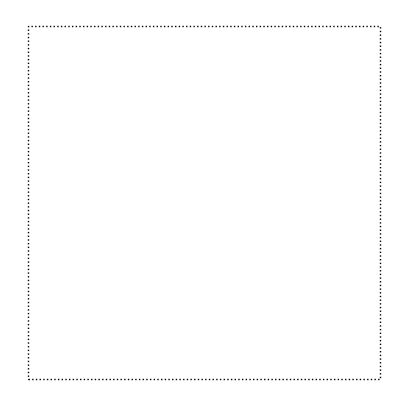

In [62]:
blank

Usando questi due tile, possiamo costruire un nuovo "quartetto" chiamato `rectric`, in cui il quadrato in alto a sinistra è un triangolo ruotato, mentre gli altri tre sono dei tile definiti in modo uguale. Ovvero possiamo definire la funzione ricorsiva:

In [66]:
def rectric(n):
    if n <= 0:
        return blank
    else:
        return quartet(rot(triangle), rectric(n-1), rectric(n-1), rectric(n-1))

Richiamando la funzione appena definita con diversi valori di $n$ dovremmo capire facilmente il processo di calcolo sviluppato da questa funzione ricorsiva.

**DOMANDA 3**: Cosa vi aspettate come risultato della chiamata alla funzione `rectric(1)`?

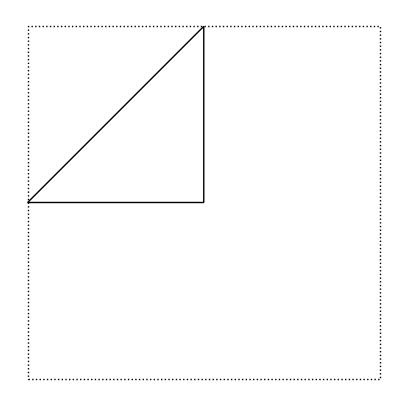

In [67]:
rectric(1)

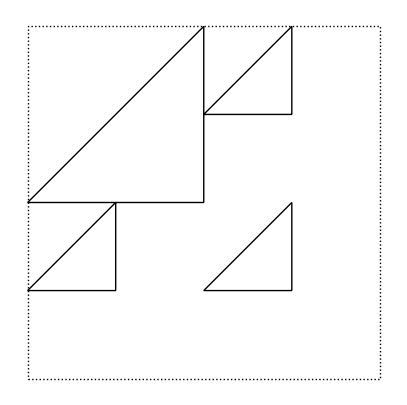

In [68]:
rectric(2)

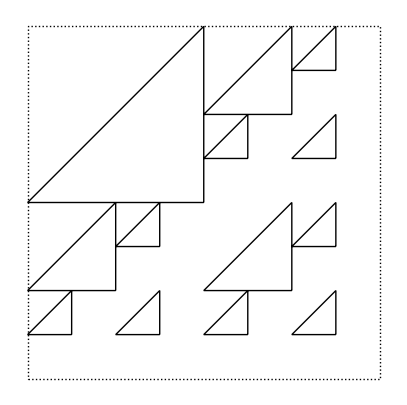

In [69]:
rectric(3)

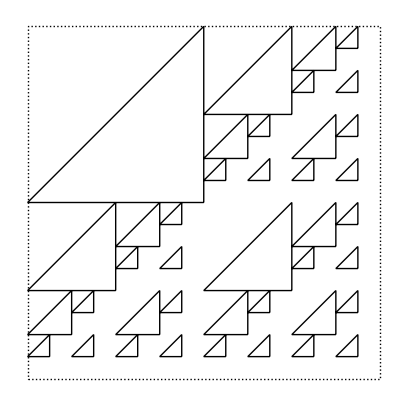

In [70]:
rectric(4)

### 3.2.5 Altre trasformazioni di base
Cosa potremmo fare se invece di un "quartetto" volessimo ottenere la combinazione di nove tile in una griglia 3 per 3? L'operazione ``beside`` che abbiamo introdotto prima, partiziona lo spazio verticale in due parti uguali. Quindi non possiamo usarla per definire una griglia 3 per 3 senza prima aggiungere la possibilità di definire quanto spazio lasciare per il primo tile e quanto per il secondo.

In pratica, vogliamo poter passare come argomento alla funzione `beside` la frazione di spazio occupata dal primo tile e la frazione usata dal secondo:

In [ ]:
beside(flip(f), f, 2, 3)

In pratica, abbiamo introdotto la funzione `beside(x, y, a, b)`, che prende in input quattro parametri. I due nuovi parametri `a` e `b` servono per stabilire quanto spazio lasciare al primo tile a quanto al secondo.

Nella chiamata precedente, il primo tile ha occupato i 2/5 dello spazio orizzontale disponibile (ovvero $\frac{a}{a+b}$), mentre la seconda tile ha occupato i 3/5 (ovvero $\frac{a}{a+b}$). 

In modo analogo, anche la funzione ``above`` può prendere quattro parametri: `above(x, y, a, b)`, in cui i parametri `a` e `b` hanno lo stesso significato della funzione precedente.

Usando queste definizioni, a questo punto possiamo definire la funzione ``nonet``:

In [71]:
def nonet(p, q, r, s, t, u, v, w, x):
    return above(
            beside(p, beside(q,r), 1, 2),
            above(
                beside(s, beside(t, u), 1, 2),
                beside(v, beside(w, x), 1, 2)
            ),
            1, 2)

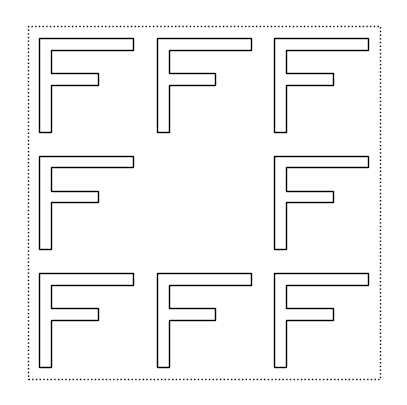

In [72]:
nonet(f,f,f,f,blank,f,f,f,f)

### 3.2.6 Decomposizione del *woodcut* di Escher
Veniamo ora al quadro da cui siamo partiti in questo notebook.

Il tile fondamentale del quadro di Escher è il seguente "pesce":

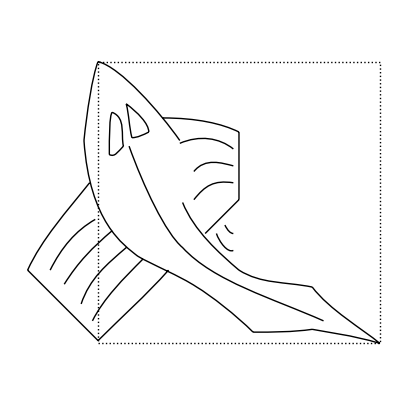

In [73]:
fish

Anche se non è completamente contenuto in un quadrato unitario, fu scelto da Escher in quanto è una forma in grado di "combaciare" con una sua stessa rotazione:

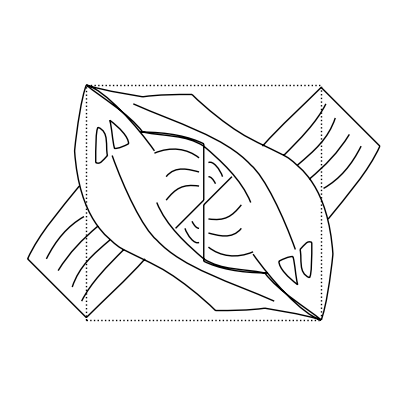

In [74]:
over(fish, rot(rot(fish)))

Questa immagine ha anche altre proprietà "*magiche*". Prima però, aggiungiamo un'altra operazione di base al nostro linguaggio grafico: definiamo una trasformazione, chiamata ``rot45()`` che ruota un tile di $45^o$ in senso antiorario e la ridimensiona di una fattore $\sqrt{2}$. Vediamo cosa esegue questa trasformazione usando un triangolo:

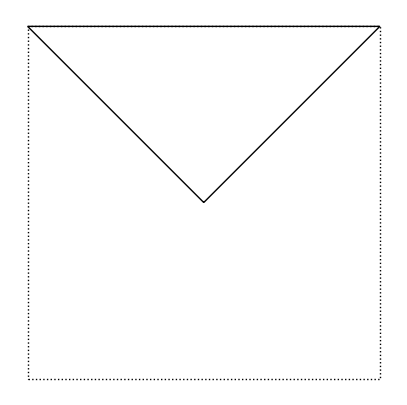

In [75]:
rot45(triangle)

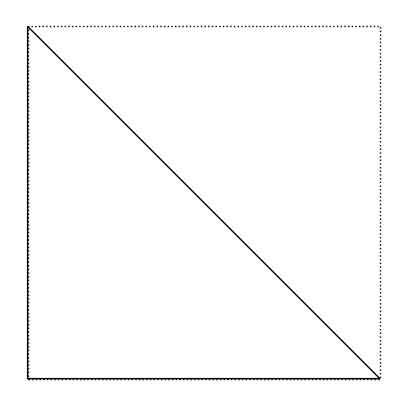

In [76]:
triangle

Il pesce è cosi "*magico*" perché se prendiamo questa nuova trasformazione e la tile che produce, possiamo comporre diverse operazioni per ottenere le tile seguenti:

In [79]:
smallfish = flip(rot45(fish))

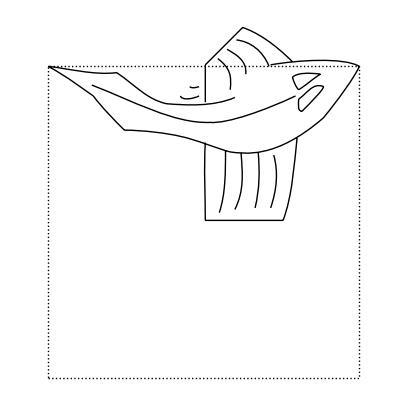

In [80]:
smallfish

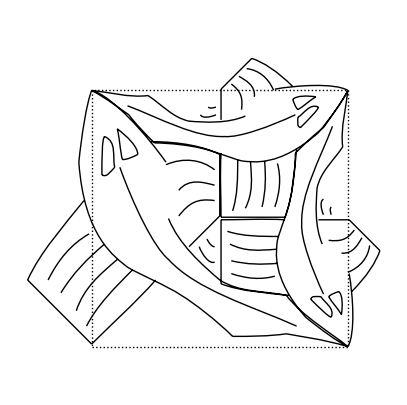

In [81]:
t = over(fish, over(smallfish, rot(rot(rot(smallfish)))))
t

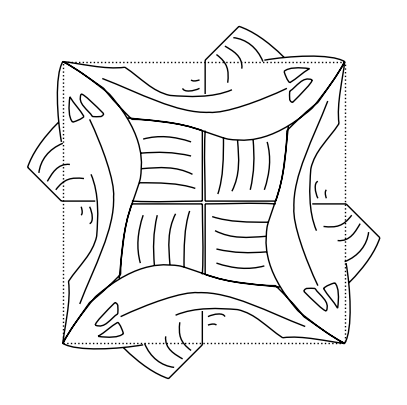

In [82]:
u = over(over(over(smallfish, rot(smallfish)), rot(rot(smallfish))), rot(rot(rot(smallfish))))
u

Si osservi che le due tile ``t`` e ``u`` appena definite solo i blocchi base del quadro:

![Escher's Fish](fishEscher.jpg)

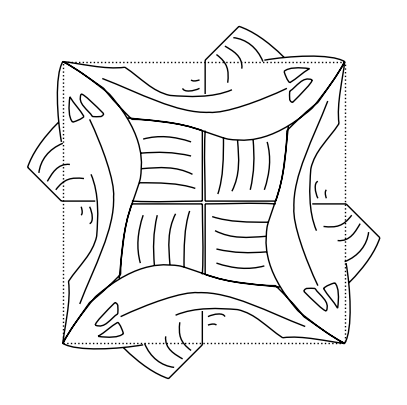

In [83]:
u

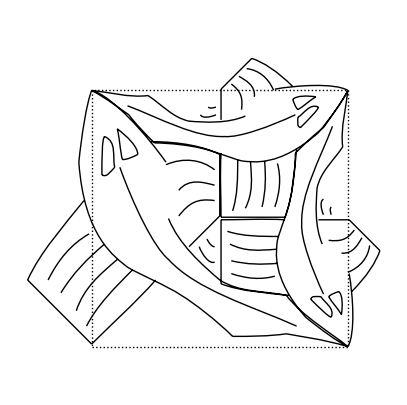

In [84]:
t

Questi due blocchi base vengono utilizzati per definire due funzioni ricorsive:

In [89]:
def side(n):
    if n == 0: 
        return blank
    else: 
        return quartet(side(n-1), side(n-1), rot(t), t)

In [90]:
def corner(n):
    if n == 0:
        return blank
    else:
        return quartet(corner(n-1), side(n-1), rot(side(n-1)), u)

Vediamo ora cosa fanno in pratica queste due funzioni.

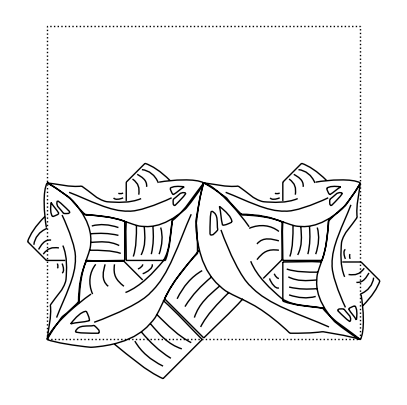

In [91]:
side(1)

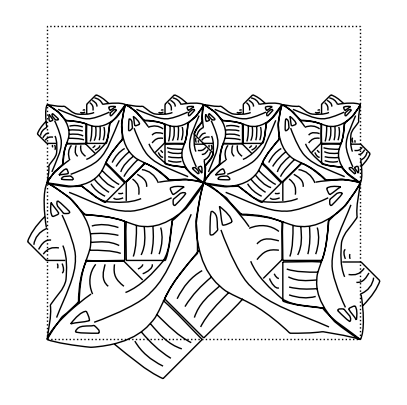

In [92]:
side(2)

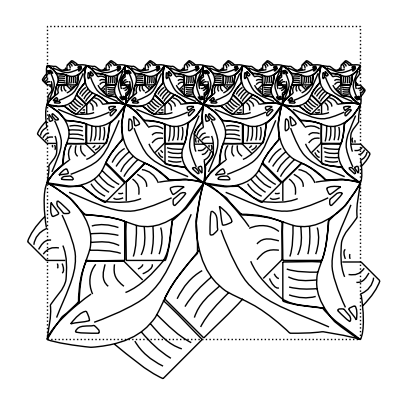

In [93]:
side(3)

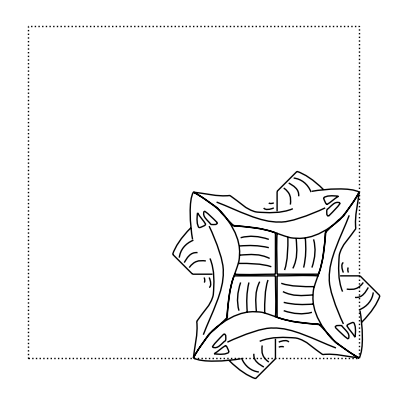

In [94]:
corner(1)

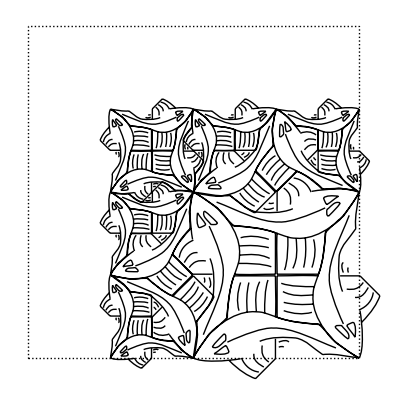

In [95]:
corner(2)

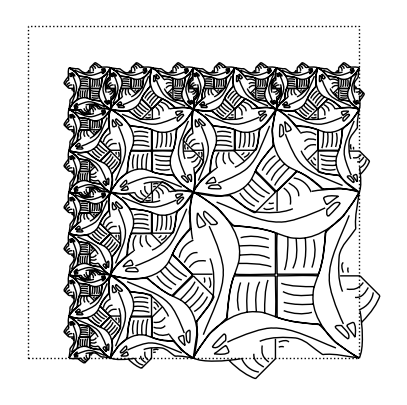

In [96]:
corner(3)

A questo punto abbiamo tutti gli elementi per arrivare a definire un'immagine grafica di un certo effetto, componendo tutte le varie operazioni introdotte:

In [97]:
def squarelimit(n):
    return nonet(
        corner(n), 
        side(n), 
        rot(rot(rot(corner(n)))), 
        rot(side(n)), 
        u, 
        rot(rot(rot(side(n)))),
        rot(corner(n)), 
        rot(rot(side(n))), 
        rot(rot(corner(n)))
    )

In [98]:
setSize(10)

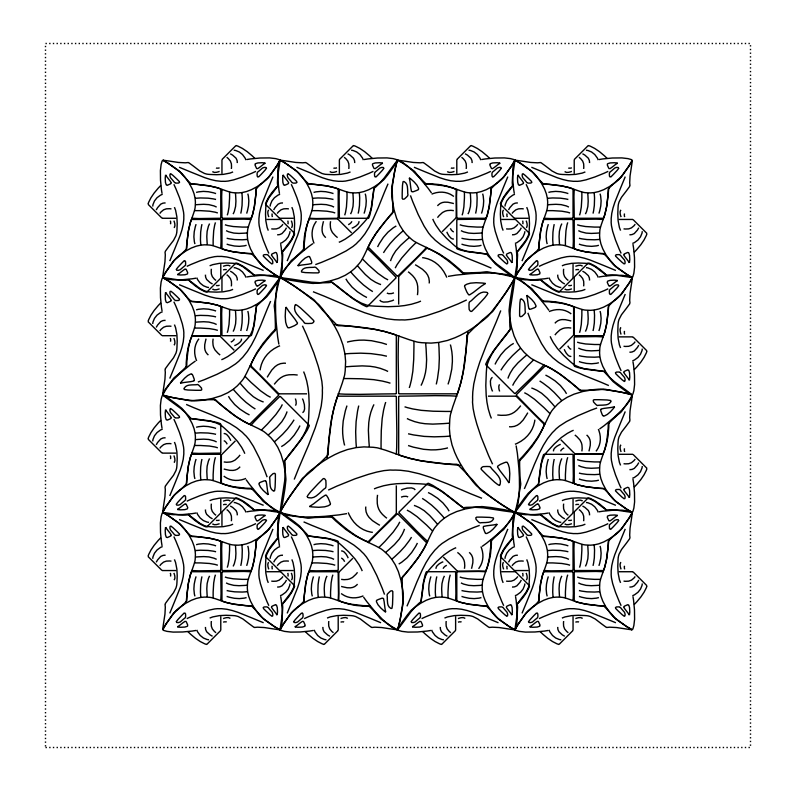

In [99]:
squarelimit(1)

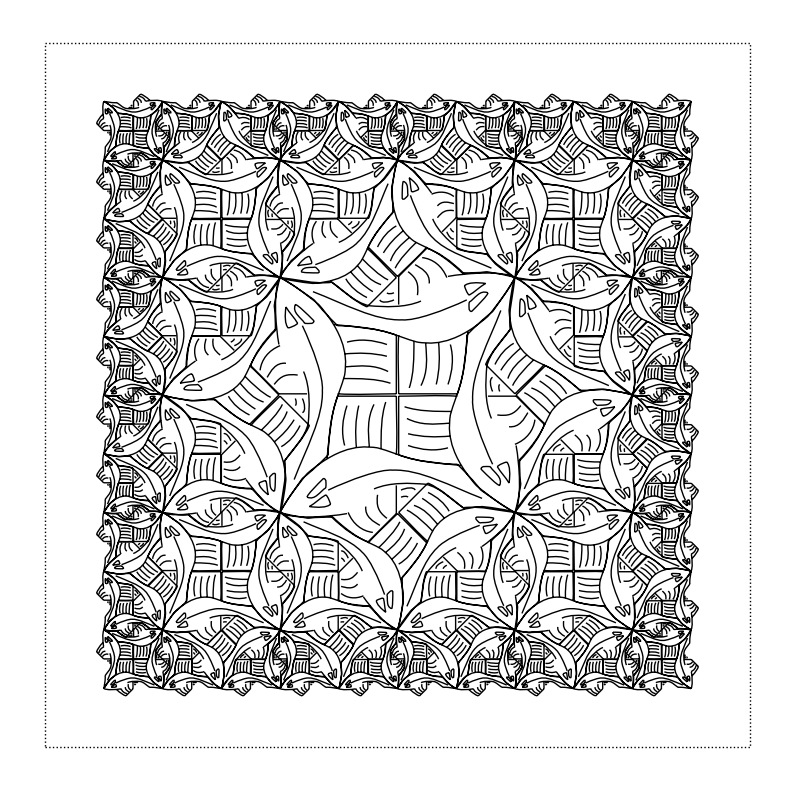

In [100]:
squarelimit(2)

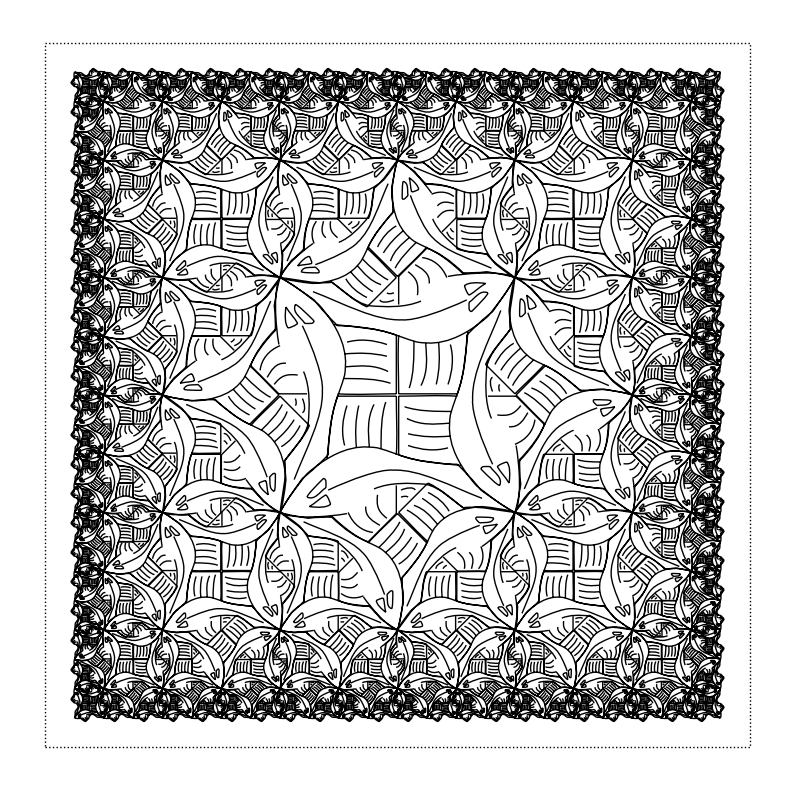

In [101]:
squarelimit(3)

   ## Approfondimenti
  Gli studenti interessati, possono approfondire gli argomenti introdotti in questa lezione, leggendo un articolo di [Functional Geometry](https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf) e provare ad individuare connessioni con argomenti affrontati in altri corsi.

## 3.3 Frattali

**NOTA:** Da fare nelle prossime lezioni

## 3.4 Esercizi

### 3.4.1 Plot della funzione tangente

### 3.4.2 Plot di immagini ricorsive

In questo paragrafo, vengono proposti esercizi che hanno l'obiettivo di far utilizzare gli elementi di programmazione visti per produrre il *woodcut* di Escher, ma soprattutto di stimolare la vostra curiosità e fantasia.

Per prima cosa dovete importare la libreria `tiles`, con il comando seguente:

In [1]:
from tiles import *

Se volete vedere i comandi della libreria che avete importato potete usare il comando `who`:

In [2]:
who

ARC	 Chess	 EDGE	 Eye	 Irish	 Spiral	 Squares	 TQ	 TR	 
above	 beside	 flip	 nonet	 os	 over	 parse	 quartet	 rot	 
rot45	 saveTile	 setSize	 sys	 


La libreria vi mette a disposizione:

1. Le funzioni già viste: `above, beside, flip, nonet, over, rot, rot45`
2. Delle stringhe che possono essere usate per definire dei nuovi tile: `TQ, TR, ARC, EDGE`
3. Delle funzioni ricorsive che producono semplici immagini ricorsive: `Chess, Eye, Irish, Spiral`
4. Alcuni comandi nuovi: `parse, saveTile, setSize`

**Definizione di nuovi tiles**

Utilizzando il comando `parse(<stringa>)` è possibile definire dei nuovi tile.

Considerate la stringa seguente:

In [3]:
TR = "M 0,1         L 1,1         L 0,0         L 0,1"

Questa stringa rappresenta una sequenza di comandi che una "penna meccanica" dovrebbe seguire per disegnare un tile.
La stringa contiene due tipi di lettere: **M e L**:

* La lettera **M** indica il comando "*move to position x,y*" 
* La lettera **L** indica il comando "*draw a line till position x,y*" 

Si noti che la posizione (0,0) è in alto a sinistra, e la posizione (1,1) è invece in basso a destra.

Se passiamo questa stringa in input alla funzione `parse`, otteniamo in output quanto segue:

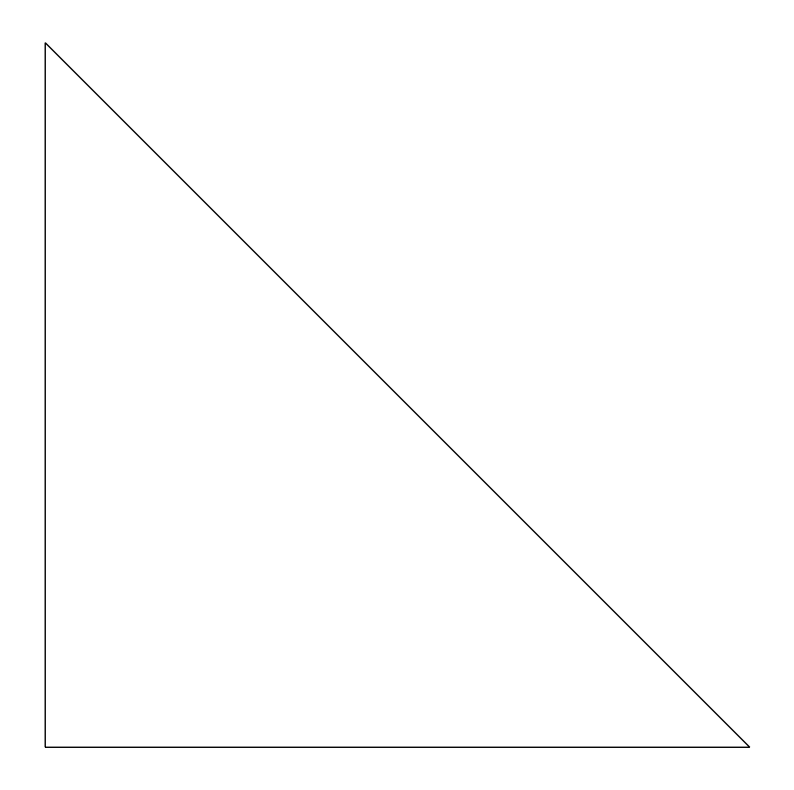

In [4]:
parse(TR)

La funzione `setSize(n)` della libreria `tiles.py` serve per dare una dimensione al quadrato unitario in cui vengono disegnate le vostre tile. Esempio>

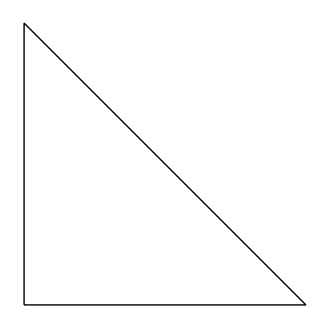

In [5]:
setSize(4)
parse(TR)

La funzione `parse` ha in realtà altri tre variabili di input che servono per indicare se si vuole una figura colorata, che colore usare per il bordo e che colore usare per la parte interna:

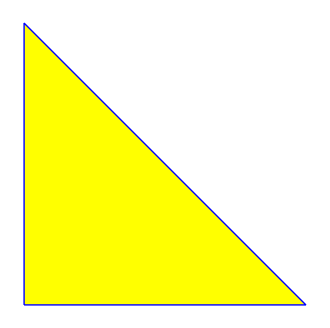

In [6]:
parse(TR, fill=True, faceColor='yellow', edgeColor='blue')

Per definire un quadrato nero, si può usare la stringa **TQ** della libreria tiles nel modo seguente:

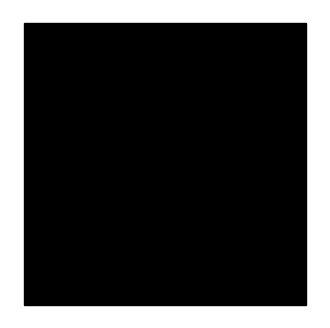

In [7]:
parse(TQ, fill=True, faceColor='black', edgeColor='black')

In [8]:
b = parse(TQ, fill=True, faceColor='blue', edgeColor='blue')
w = parse(TQ, fill=True, faceColor='red', edgeColor='red')

In [9]:
a = quartet(b,w,w,b)

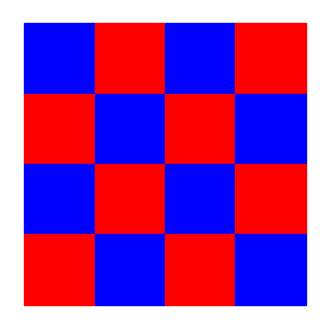

In [10]:
quartet(a,a,a,a) 

**ESERCIZIO 1: La scacchiera**

Definite un tile *blank* e uno *black*, e a partire da questi due tile, utilizzando la funzione `quartet` in modo ricorsivo, scrivere una funzione che produca una scacchiera 8x8.

In [ ]:
# DA SVOLGERE

**ESERCIZIO 2: Quadrati psichedelici**

Definite quadrati colorati, e utilizzando la funzione `quartet` in modo ricorsivo, scrivere una funzione che produca una sequenza di quadrati *psichedelici* simile all'immagine seguente:

![Psichedelici](images/squares.png)

**ESERCZIO 3: Irish fantasy**
Utilizzando le diverse funzioni della libreria tiles, scrivere una funzione ricorsiva che produca un tile simile all'immagine seguente:

![Irish](images/irish.png)

Potete utilizzare i due tile seguenti:

In [11]:
p1 = parse(EDGE, fill=True, edgeColor='black', faceColor='darkgreen')
p2 = parse(EDGE, fill=True, edgeColor='black', faceColor='blue')

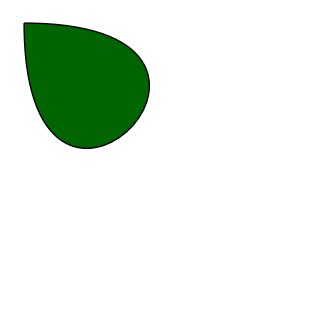

In [12]:
p1

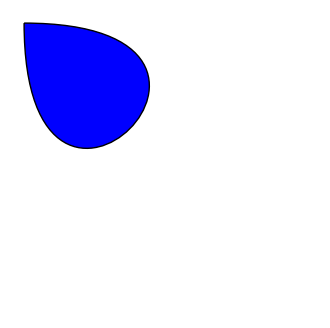

In [13]:
p2

**CHALLENGE: Miglior Immagine Ricorsiva**

Usate la vostra fantasia per creare un'immagine ricorsiva: BUON DIVERTIMENTO!

*NOTA:* Le migliore immagini saranno inserite in questo libro.